<a href="https://colab.research.google.com/github/siddharthabhuyan86/geowebapp/blob/main/Hands_on_qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python environment with the following packages installed:

*   `qiskit` v2.1.0 or newer
*   `qiskit-ibm-runtime` v0.40.1 or newer
*   `qiskit-aer` v0.17.0 or newer
*   `qiskit.visualization`
*   `numpy`
*   `pylatexenc`

In [ ]:
# install dependencies
!pip install 'qiskit>=2.1.0' 'qiskit-ibm-runtime>=0.40.1' 'qiskit-aer>=0.17.0' 'numpy' 'pylatexenc' 'matplotlib' --quiet

In [ ]:
import numpy as np
from qiskit import QuantumCircuit

# 1. A quantum circuit for preparing the quantum state |000> + i |111> / √2
qc = QuantumCircuit(3)
qc.h(0)             # generate superposition
qc.p(np.pi / 2, 0)  # add quantum phase
qc.cx(0, 1)         # 0th-qubit-Controlled-NOT gate on 1st qubit
qc.cx(0, 2)         # 0th-qubit-Controlled-NOT gate on 2nd qubit

In [ ]:
# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc.measure_all(inplace=False)

# 3. Execute using the Sampler primitive
from qiskit.primitives import StatevectorSampler
sampler = StatevectorSampler()
job = sampler.run([qc_measured], shots=1000)
result = job.result()
print(f" > Counts: {result[0].data['meas'].get_counts()}")

 > Counts: {'111': 456, '000': 544}


In [ ]:
print("Results :", result )

Results : PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1000, num_bits=3>)), metadata={'shots': 1000, 'circuit_metadata': {}})], metadata={'version': 2})


In [ ]:
## TRANSPILER
from qiskit import transpile
from qiskit.transpiler import Target, CouplingMap
target = Target.from_configuration(
    basis_gates=["cz", "sx", "rz"],
    coupling_map=CouplingMap.from_line(3),
)
qc_transpiled = transpile(qc, target=target)

# The Deutsch-Jozsa algorithm

Early Quantum Computing Insight:

*   In the early 1980s, quantum physicists and computer scientists speculated that quantum computers could solve certain problems more efficiently than classical computers.

David Deutsch's Contribution (1985):

*   David Deutsch described the first "universal quantum computer" and provided the first problem (Deutsch's algorithm) that demonstrated a quantum computer's potential to outperform a classical computer.

Evolution of Quantum Algorithms:

*   The Deutsch-Jozsa algorithm, an extension of Deutsch's work, further demonstrated quantum advantages over classical algorithms.

Importance of Deutsch's and Deutsch-Jozsa Algorithms:

*   While not practically useful today, these algorithms are historically important for the following reasons:

*   They were among the first to show quantum algorithms outperforming classical ones.

*   They provide insights into what gives quantum computers their computational power.

Quantum Power vs. Classical Parallelism:

*   The algorithms reveal that quantum computing's power doesn't come from just scaling up classical parallelism but from subtle quantum processes like "quantum parallelism" and efficient information extraction.

*   These algorithms serve as foundational steps in understanding the broader potential of quantum computing.

### Quantum Parallelism and its Limits

1. **Quantum Parallelism**:
   - Quantum computing leverages the ability to perform operations on multiple inputs simultaneously by utilizing superposition, where qubits can exist in multiple states at once.

2. **Limitations**:
   - While a quantum circuit can process multiple inputs simultaneously, extracting all the information from those states at once is impossible.

3. **Example with a Function**:
   - The example demonstrates how a quantum circuit can help determine which of four binary functions a given bit is subject to (e.g., $f_1(x)$, $f_2(x)$, etc.).
   - In a classical setting, two function evaluations (for $x = 0$ and $x = 1$) would be required, but quantum circuits aim to do this more efficiently.

4. **Quantum Gate (U_f)**:
   - The $U_f$ quantum gate computes $f(x)$ and applies the result to a second qubit, encoding both $x$ and $f(x)$ in the system.
   - The quantum state after applying this gate contains the information needed to determine the function $f(x)$, but the challenge is how to access that information.

5. **Qiskit Experiment**:
   - The section introduces Qiskit as a framework for executing quantum circuits and outlines a step-by-step approach to solve this problem, including:
     1. Mapping classical inputs to quantum problems.
     2. Optimizing for quantum execution.
     3. Executing using Qiskit Runtime Primitives.
     4. Post-processing and classical analysis.

This section emphasizes both the power and limitations of quantum parallelism and introduces the use of Qiskit for solving quantum problems.


In [ ]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import Aer, AerSimulator

backend = AerSimulator(method='statevector')
print(backend.name)

sampler = Sampler(mode=backend)

aer_simulator_statevector


The cell below will allow you to switch between using the simulator or real hardware throughout the notebook. We recommend running it now:



In [ ]:
# Load the backend sampler
from qiskit.primitives import BackendSamplerV2

# Load the Aer simulator and generate a noise model based on the currently-selected backend.
from qiskit_aer.noise import NoiseModel

# Alternatively, load a fake backend with generic properties and define a simulator.


noise_model = NoiseModel.from_backend(backend)

# Define a simulator using Aer, and use it in Sampler.
backend_sim = AerSimulator(noise_model=noise_model)
sampler_sim = BackendSamplerV2(backend=backend_sim)

# You could also define a simulator-based sampler using a generic backend:
# backend_gen = GenericBackendV2(num_qubits=18)
# sampler_gen = BackendSamplerV2(backend=backend_gen)

/usr/local/lib/python3.12/dist-packages/qiskit_aer/noise/noise_model.py:376: UserWarning: Qiskit backend AerSimulator('aer_simulator_statevector') has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


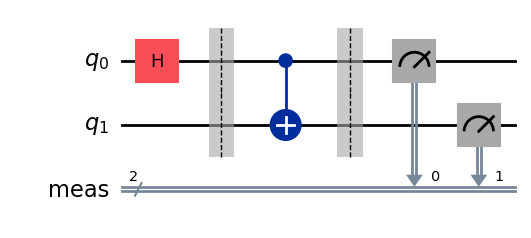

In [ ]:
# Step 1: Map

from qiskit import QuantumCircuit

qc = QuantumCircuit(2)


def twobit_function(case: int):
    """
    Generate a valid two-bit function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f


# first, convert oracle circuit (above) to a single gate for drawing purposes. otherwise, the circuit is too large to display
# blackbox = twobit_function(2).to_gate()  # you may edit the number inside "twobit_function()" to select among the four valid functions
# blackbox.label = "$U_f$"

qc.h(0)
qc.barrier()
qc.compose(twobit_function(2), inplace=True)
qc.measure_all()


qc.draw("mpl")

In the above circuit, the Hadamard gate "H" takes qubit 0, which is initially in the state $|0\rangle$, to the superposition state $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$. Then, $U_f$ evaluates the function $f(x)$ and applies that to qubit 1.

Next we need to optimize and transpile the circuit to be run on the quantum computer:



In [ ]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc)

Finally, we execute our transpiled circuit on the quantum computer and visualize our results:



In [ ]:
# Step 3: Run the job on a quantum simulator

job = sampler.run([qc_isa], shots=100)

# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead

res = job.result()

print(res)

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=100, num_bits=2>)), metadata={'shots': 100, 'circuit_metadata': {}})], metadata={'version': 2})


In [ ]:
print(f" > Counts: {res[0].data['meas'].get_counts()}")

 > Counts: {'00': 52, '11': 48}


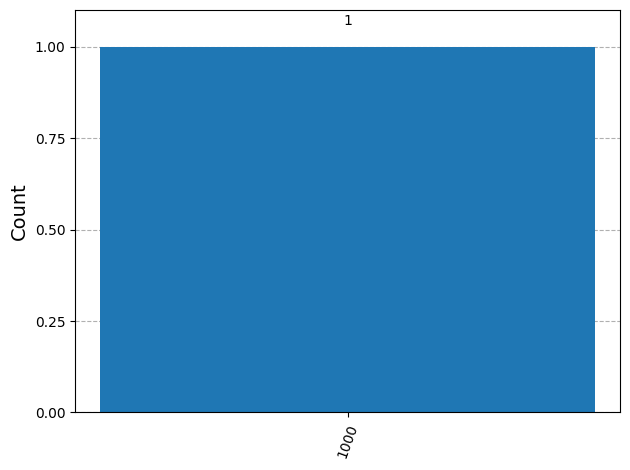

In [ ]:
# Step 4: Visualize and analyze results

## Analysis
from qiskit.visualization import plot_histogram

plot_histogram(counts)

### Quantum Parallelism and Measurement

1. **Histogram and Measurement**:
   - The histogram shows the results of running a quantum circuit with qubits in superposition. Since qubit 0 is in a superposition state, the circuit evaluates the function for both $x = 0$ and $x = 1$ at the same time.
   - In **little endian** notation, the states of qubits are written from right to left, with qubit 0 being on the far right.

2. **Quantum Parallelism vs. Classical Computers**:
   - Quantum computers can evaluate both function outputs simultaneously, something classical computers cannot do. However, measurement collapses the qubit states, limiting access to only one result per shot.

3. **Multiple Runs Required**:
   - To fully learn the function $f(x)$, at least **two runs** are necessary, since measurement collapses the state. Best case, this is equivalent to the classical case where two evaluations are needed for $f(0)$ and $f(1)$.
   - There's a possibility that multiple runs may be required due to the probabilistic nature of quantum measurement.

4. **Classical vs. Quantum**:
   - While quantum computing has advantages in parallelism, the measurement process limits its effectiveness in this case, making a **classical computer** potentially better suited for this specific task.

In essence, quantum parallelism is powerful, but measurement limitations mean it doesn’t always outperform classical solutions.


## Deutsch's algorithm


### The problem

Here was the problem:

Given an input bit, $x = \{0,1\}$, and an input function $f(x) = \{0,1\}$, determine whether the function is *balanced* or *constant*.

That is, if it's balanced, then the output of the function is 0 half the time and 1 the other half the time. If it's constant, then the output of the function is either always 0 or always 1.

The table of four possible functions taking a single bit to another a single bit:

| $x$ | $f_1(x)$ | $f_2(x)$ | $f_3(x)$ | $f_4(x)$ |
| --- | -------- | -------- | -------- | -------- |
| 0   | 0        | 0        | 1        | 1        |
| 1   | 0        | 1        | 0        | 1        |

The first and the last functions, $f_1(x)$ and $f_4(x)$, are constant, while the middle two functions, $f_2(x)$ and $f_3(x)$, are balanced.



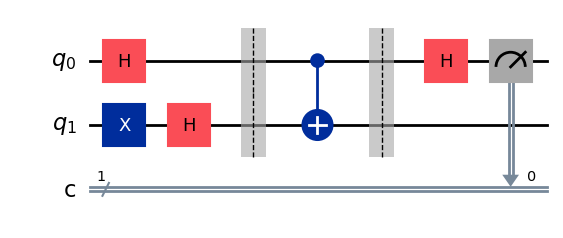

In [ ]:
## Deutsch's algorithm:

## Step 1: Map the problem

# first, convert oracle circuit (above) to a single gate for drawing purposes. otherwise, the circuit is too large to display
blackbox = twobit_function(
    3
).to_gate()  # you may edit the number (1-4) inside "twobit_function()" to select among the four valid functions
blackbox.label = "$U_f$"


qc_deutsch = QuantumCircuit(2, 1)

qc_deutsch.x(1)
qc_deutsch.h(range(2))

qc_deutsch.barrier()
qc_deutsch.compose(twobit_function(2), inplace=True)
qc_deutsch.barrier()

qc_deutsch.h(0)
qc_deutsch.measure(0, 0)

qc_deutsch.draw("mpl")

In [ ]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc_deutsch)

In [ ]:
# Step 3: Run the job on a real quantum computer

job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.c.get_counts()

In [ ]:
# Step 4: Visualize and analyze results

## Analysis
print(counts)
if "1" in counts:
    print("balanced")
else:
    print("constant")

{'1': 1}
balanced


In [ ]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc_dj)

In [ ]:
# Step 3: Run the job on a real quantum computer

job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.c.get_counts()

In [ ]:
# Step 4: Visualize and analyze results

## Analysis
print(counts)

if (
    "0" * n in counts
):  # The D-J algorithm returns all zeroes if the function was constant
    print("constant")
else:
    print("balanced")  # anything other than all zeroes means the function is balanced.

{'001': 1}
balanced


Above, the first line of the output is the bitstring of measurement outcomes. The second line outputs whether the bitstring implies that the function was balanced or constant. If the bitstring contained all zeroes, then it was constant; if not, it was balanced. So, with just a single run of the above quantum circuit, we can determine whether the function is constant or balanced!

#### Check your understanding

Read the questions below, think about your answers, then click the triangles to reveal the solutions.

<details>
  <summary>
    How many queries would it take a classical computer to determine with 100% certainty whether a function were constant or balanced? Remember, classically, a single query only allows you to apply the function to a single bitstring.
  </summary>

  **Answer:**

  There are $2^n$ possible bitstrings to check, and in the worst case, you would need to test $2^n/2+1$ of these. For example, if the function were constant, and you kept measuring "1" as the output of the function, then you couldn't be certain that it was truly constant until you checked over half of the results. Before then, you might have just been very unlucky to keep measuring "1" on a balanced function. It's like flipping a coin over and over and it landing heads every time. It's unlikely, but not impossible.
</details>

<details>
  <summary>
    How would your above answer change if you just had to just measure until one outcome (balanced or constant) is more likely than the other? How many queries would it take in this case?
  </summary>

  **Answer:**

  In this case, you could just measure twice. If the two measurements are different, you know the function is balanced. If the two measurements are the same, then it could be balanced, or it could be constant. The probability that it's balanced with this set of measurements is: $\frac{1}{2}\frac{2^n /2 - 1}{2^n-1}$. This is less than 1/2, so it's more likely that the function is constant in this case.
</details>

So, the Deutsch-Jozsa algorithm demonstrated an exponential speed-up over a *deterministic* classical algorithm (one that returns the answer with 100% certainty), but no significant speed-up over a *probabilistic* one (one that returns a result that is *likely* to be the correct answer).



### The Bernstein-Vazirani Problem

1. **Problem Setup**:
   - In 1997, Bernstein and Vazirani used the Deutsch-Jozsa algorithm to solve a specific problem: learning a secret $n$-bit string $s$ from a function $f(x) = s \cdot x$ (dot product modulo 2).
   - The task is to determine the secret string $s$ given a function $f: \{0, 1\}^n \to \{0, 1\}$.

2. **Quantum Algorithm Steps**:
   - **Step 1**: Apply a Hadamard gate to all qubits to create a superposition.
   - **Step 2**: Apply the $U_f$ quantum gate, which encodes the function $f(x) = s \cdot x$ on the qubits. The state of the system becomes $|\Psi\rangle = |-\rangle \otimes \frac{1}{\sqrt{2^n}} \sum\limits_{x \in \Sigma^n} (-1)^{f(x)} |x\rangle$.
   - **Step 3**: Apply another set of Hadamard gates to qubits 0 through $n-1$. The state simplifies to $|\Psi\rangle = |-\rangle \otimes |s\rangle$, where the qubits are in the state $|s\rangle$.
   - **Step 4**: Measure the first $n$ qubits, which gives the secret string $s$.

3. **Key Insights**:
   - The algorithm effectively finds the secret string $s$ by using quantum phase kickback, which leads to a state where the $n$ input qubits are in the state $|s\rangle$ after measurement.

4. **Check Your Understanding**:
   - **Step 3 for $n=1$**: For $n=1$, the state simplifies to $|\Psi\rangle = |s\rangle$, confirming that the algorithm works for the simplest case.
   - **Deutsch-Jozsa and Bernstein-Vazirani Link**: Bernstein-Vazirani functions are also Deutsch-Jozsa functions. If $s = 00...00$, the function is constant; if $s$ has at least one "1", the function is balanced. Therefore, the Deutsch-Jozsa algorithm solves both problems simultaneously.

5. **Experimental Validation**:
   - The algorithm can be tested experimentally by constructing the Bernstein-Vazirani function and running the quantum circuit to verify that the secret string $s$ is correctly identified.

This shows how the same quantum algorithm (Deutsch-Jozsa) can be applied to solve both the Bernstein-Vazirani and Deutsch-Jozsa problems efficiently.


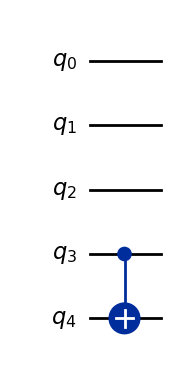

In [ ]:
# Step 1: Map the problem


def bv_function(s):
    """
    Create a Bernstein-Vazirani function from a string of 1s and 0s.
    """
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc


display(bv_function("1000").draw("mpl"))

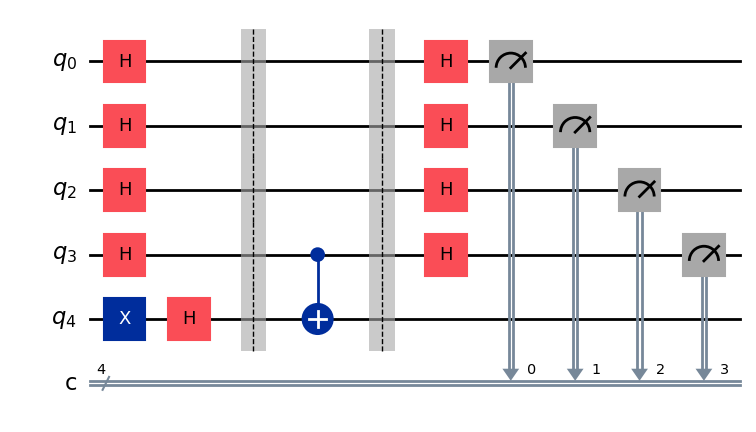

In [ ]:
string = "1000"  # secret string that we'll pretend we don't know or have access to
n = len(string)

qc = QuantumCircuit(n + 1, n)
qc.x(n)
qc.h(range(n + 1))
qc.barrier()
# qc.compose(oracle, inplace = True)
qc.compose(bv_function(string), inplace=True)
qc.barrier()
qc.h(range(n))
qc.measure(range(n), range(n))

qc.draw("mpl")

In [ ]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc)

In [ ]:
# Step 3: Run the job on a real quantum computer

job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc_isa],shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.c.get_counts()

In [ ]:
# Step 4: Visualize and analyze results

## Analysis
print(counts)

{'1000': 1}


So, with just a single query, the Deutsch-Jozsa algorithm will return the string $s$ used in the function: $f(x)=x \cdot s$ when we apply it to the Bernstein-Vazirani problem. With a classical algorithm, one would need $n$ queries to solve the same problem.

## Conclusion

We hope that by examining these simple examples, we've given you a better intuition for how quantum computers are able to harness superposition, entanglement, and interference to achieve their power over classical computers.




### Trailing cell contains the code where one can use their personal API_KEY and choosed IBM_instance to run the same implementation on REAL IBM Quantum Computer.



**To set up and install ::** [Install Qiskit](/docs/guides/install-qiskit)

**To obtain API Key::** In order to run jobs on real quantum computers, students will need to set up an account with IBM Quantum® by following the steps in the [Set up your IBM Cloud account](/docs/guides/cloud-setup) guide.



In [ ]:
# # Load the Qiskit Runtime service
# from qiskit_ibm_runtime import QiskitRuntimeService

# # Load the Runtime primitive and session
# from qiskit_ibm_runtime import SamplerV2 as Sampler

# # Syntax for first saving your token.  Delete these lines after saving your credentials.
# # QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '<YOUR_IBM_INSTANCE_CRN>', token='<YOUR_API_KEY>', overwrite=True, set_as_default=True)
# # service = QiskitRuntimeService(channel='ibm_quantum_platform')

# # Load saved credentials
# service = QiskitRuntimeService()

# # Use the least busy backend, or uncomment the loading of a specific backend like "ibm_brisbane".
# # backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)
# backend = service.backend("ibm_brisbane")
# print(backend.name)


# sampler = Sampler(mode=backend)